This script was created for the paper 'An analytical method for body-exact hydrodynamic modeling of wave energy converters' (submitted to Applied Ocean Research).
This paper presents
- presents a novel way ("analytic method") to estimate the hydrodynamic forces on a body at the instantanious body-position ("body-exact")
- introduces an improved formulation for body-exact radiation
- compares (linear) hydrodynamic models for wave energy converter in characeristic scenarios

Before running the script, please install the required control algorithm and create the folders (decay, data) to store the simulation the data. 

## Hydrodynamic coefficents
Comparsion of hydrodynamic coefficents with data from capytaine/Nemoh BEM solver.

LUT table h spacing: -4.05: 0.45 : 3.6
LUT table p spacing: 0: 0.0 : 0



/home/gast/Dokumente/github/COERbuoy/COERbuoy/floater.py:217: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  forces=np.array([[0,0,0],[self.omega*0,self.omega*0,self.omega*0]]);
/home/gast/Dokumente/github/COERbuoy/COERbuoy/floater.py:227: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  forces = forces + e.Calculate(z0, x0, delta0, eta);
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)

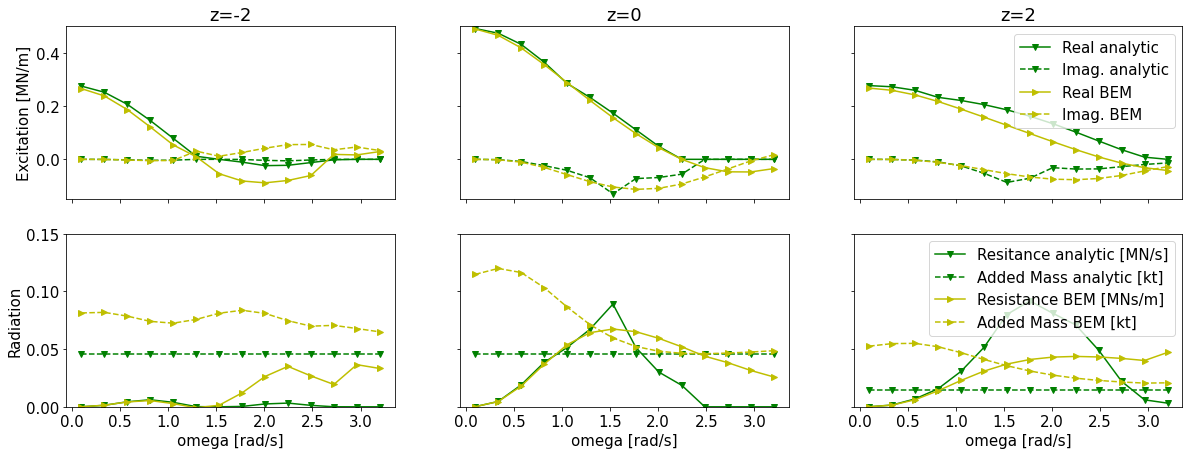

In [5]:
import COERbuoy.Parameters;
import numpy as np;
import matplotlib.pyplot as plt;
import COERbuoy.utils as u;

u.set_settings("WECfolder","[data.COERsimple]");

z=0.0;
omega0=np.linspace(0.1,3.2,14);

i=0;
fig, axes=plt.subplots(2,3);
fig.set_figwidth(20)
fig.set_figheight(7)

plt.rc('font', size=15) #controls default text size

#Initialise two "Parameters" Objects from the COERbuoy framework.
# Given are:
# - the buoy design (here specified in the folder COERsimple)
# - and the hydrodynamic algorithm
#     *"Floater" is a fast estimation using hydrodynamic relations ("analytical method"),
#     *while "Floater_BEM" uses a boundary element based approach

param = COERbuoy.Parameters.parameters("[data.COERsimple]","Floater");
param.init_hydro(omega0); #select the frequencies

param2 = COERbuoy.Parameters.parameters("[data.COERsimple]","Floater_BEM");
param2.init_hydro(omega0); #select the frequencies

# Loop to get hydrodynamic parameters for different submergence level
for z in [-2,0,2]:
    #Obtaining linear hydrodynamic parameter from the analytical method for submergence z
    hyparams=param.hydro(z,1,1);#usage: params.hydro (submergence[m],mode1=[1=heave],mode2[1=heave])
                                #returns: [buoyancy, excitation, rad. impedance, added mass at inf.]
    m0=np.imag(hyparams[3]);
    rad1=np.real(hyparams[2]);
    mad1=-np.imag(-hyparams[2]);
    exc1=np.real(hyparams[1]);


    #Obtaining linear hydrodynamic parameter from the BEM based method for submergence z
    hyparams2=param2.hydro(z,1,1); #usage: params.hydro(submergence[m],mode1=[1=heave],mode2[1=heave])
                                   #returns: [buoyancy, excitation, rad. impedance, added mass at inf.]
    m02=np.imag(hyparams2[3]);
    rad2=np.real(hyparams2[2]);
    mad2=-np.imag(-hyparams2[2]);
    exc2=np.real(hyparams2[1]);
    ka=omega0**2/9.81*4.5;


    axes[0,i].plot(omega0,np.real(hyparams[1]/1e6),"g",marker="v");
    axes[0,i].plot(omega0,np.imag(hyparams[1]/1e6),"g--",marker="v");
    axes[0,i].plot(omega0,np.real(hyparams2[1]/1e6),"y",marker=">");
    axes[0,i].plot(omega0,np.imag(hyparams2[1]/1e6),"y--",marker=">");
    axes[0,i].set_ylim(-150000/1e6,500000/1e6);
    axes[0,i].set(ylabel='Excitation [MN/m]')
    if False:#(i-1)<1:
        print(i)
        plt.xlabel("omega [rad/s]");
        plt.ylabel("[F/m]");
        plt.legend(["real part (analytic)","imag part (analytic)","real part (Nemoh)","imag part (Nemoh)"]);

        
    
    axes[0,i].set_title("z="+str(z))
    axes[1,i].plot(omega0,rad1/1e6,"g",marker="v");
    axes[1,i].plot(omega0,mad1/1e6,"g--",marker="v");
    axes[1,i].plot(omega0,rad2/1e6,"y",marker=">");
    axes[1,i].plot(omega0,mad2/1e6,"y--",marker=">");
    axes[1,i].set_ylim(0,150000/1e6);
    axes[1,i].set(ylabel='Radiation')
    i=i+1;
    
for ax in axes.flat:
    ax.set(xlabel='omega [rad/s]')


for ax in axes.flat:
    ax.label_outer()

axes[0,2].legend(["Real analytic","Imag. analytic","Real BEM","Imag. BEM"])
axes[1,2].legend(["Resitance analytic [MN/s]","Added Mass analytic [kt]","Resistance BEM [MNs/m]","Added Mass BEM [kt]"])

fig.show();
fig.savefig("evaluation_parameters.pdf")

## Decay test
In (Kramer et al) a benchmarking scenario for hydrodynamic model was presented: A sphere with a diameter of D=300 mm, decays in a water tank from a drop height of 0.1, 0.3 and 0.5 of the sphere diameter.

In the following the test scnearios are conducted using the following hydrodynamic models:
- Floater_BEM: pre-calculated hydrodynamic data, using the boundary-element method; parameters obtained at (near) the current body position
- Floater_LIN: pre-calculated hydrodynamic data, using the boundary-element method, data linearised at equilibrium body position
- Floater: instantanious hydrodynamic parameter estimation using hydrodynamic relations ("analytical method")
- Floater_FKRAD: instantaniously calculated body-exact Froude-Krylov forces and pre-calculated equilibrium based diffraction data. Radiation data obtained via Haskind-relation (partly body-exact)

The results are plotted along with the experimental data from (Kramer et al).


(Kramer et al) Kramer, M.B.; Andersen, J.; Thomas, S.; Bendixen, F.B.; Bingham, H.; Read, R.; Holk, N.; Ransley, E.; Brown, S.; Yu, Y.-H.; et al. Highly Accurate Experimental Heave Decay Tests with a Floating Sphere: A Public Benchmark Dataset for Model Validation of Fluid–Structure Interaction. Energies 2021, 14, 269. https://doi.org/10.3390/en14020269 

In [ ]:
from COERbuoy import start_simu, decay_test
import COERbuoy.utils as u;
import numpy as np;

u.set_settings("WECfolder","[data.OESsphere]");
for height in [0.03, 0.09, 0.15]:
    u.set_settings("hydro","Floater_BEM");
    decay_test([height],"decay/decay_OES_FloaterLUT"+str(height)+".csv",20,"none")[-1];
    u.set_settings("hydro","Floater_LIN");
    decay_test([height],"decay/decay_OES_FloaterLIN"+str(height)+".csv",20,"none")[-1];
    u.set_settings("hydro","Floater");
    decay_test([height],"decay/decay_OES_Floater"+str(height)+".csv",20,"none")[-1];
    u.set_settings("hydro","Floater_FKRAD");
    decay_test([height],"decay/decay_OES_FloaterFKRAD"+str(height)+".csv",20,"none")[-1];

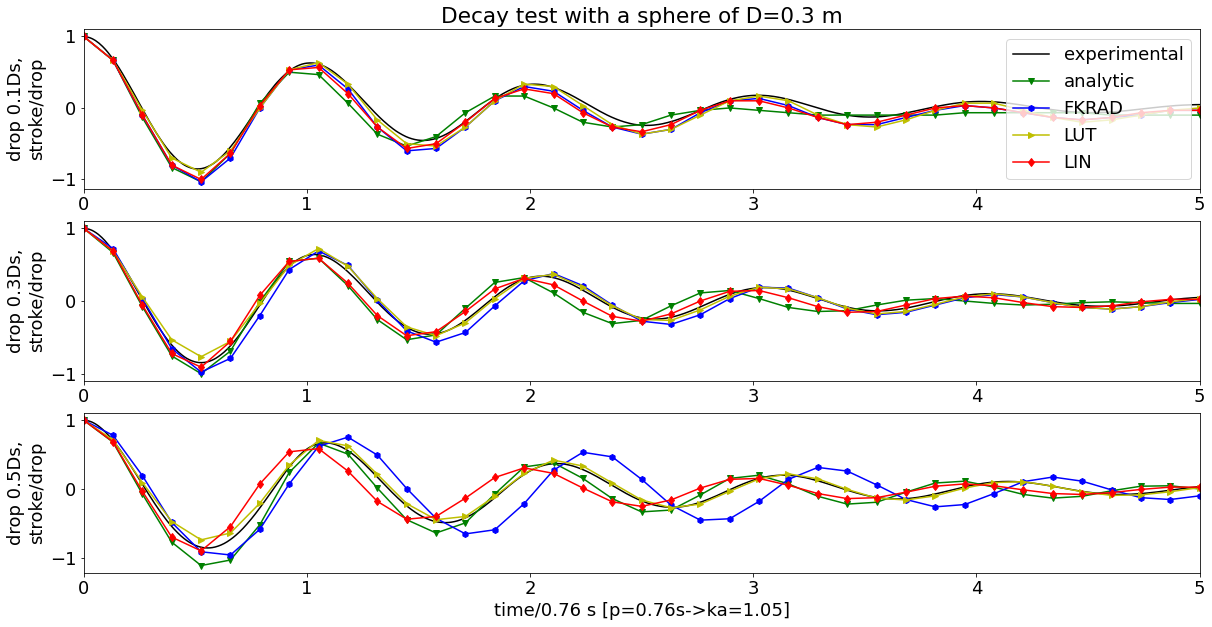

In [25]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;
import pandas;

a=l.Analyzer();
names=["decay/decay_OES_Floater","decay/decay_OES_FloaterFKRAD","decay/decay_OES_FloaterLUT","decay/decay_OES_FloaterLIN"]
desc=["experimental","analytic","FKRAD","LUT","LIN"]

fig, axes=plt.subplots(3,1);
fig.set_figwidth(20)
fig.set_figheight(10)
plt.rc('font', size=18) #controls default text size

c=["r","c","b","y","g"]*5
sy=["d","p","h",">","v"]
label=["LIN","FK","FKRAD","LUT","analytic"];

colors=["g","b","y","r"];
colors=["g-v","b-h","y->","r-d"];

for (i,height) in enumerate([0.03,0.09,0.15]):
    exp=pandas.read_csv("DecayExp_"+str(height)+".txt",sep="\t");
    axes[i].plot(exp.iloc[:,0],exp.iloc[:,1],"k")
    for d,n,c in zip(desc,names,colors):
        data=a.read_file(n+str(height)+".csv")[1];
        axes[i].plot(data[0,:40]/0.76,data[2,:40]/height,c);
    axes[i].set_xlim(0,5);
    axes[i].set_ylabel("drop "+str(height/0.3)+"Ds,\nstroke/drop");
axes[2].set_xlabel("time/0.76 s [p=0.76s->ka=1.05]");
axes[0].set_title("Decay test with a sphere of D=0.3 m");

axes[0].legend(desc,loc="center right");
plt.show();
fig.savefig("evaluation_decay.pdf")

## Wave energy converter operation scenarios
A "wave-follower" scenario, using a constant velocity-depending motor damping term and a "controlled wave energy converter" scenario, with a stroke limited resonant controller.

In [ ]:
from COERbuoy import start_simu, reg_wave
import COERbuoy.utils as u;
import numpy as np;
import os;

ps=[4,6,8,10,12]#np.arange(6,12,2);

u.set_settings("WECfolder","[data.COERsimple]");
for p in ps:
    for h in [1,3]:
        for ctrl in ["linear","controller_ninetydegree2.py "+str(p)+" "+str(h)]:
            for model in ["Floater_FKRAD","Floater", "Floater_LIN","Floater_FK"]:
                    w=reg_wave(h,p);
                    print([p,h,ctrl,model])
                    u.set_settings("hydro",model);
                    start_simu(wave=w,name="data",control=ctrl)[-1];
                    try:
                        os.rename("test.csv_f.txt", "forces"+"_"+str(h)+"_"+str(p)+"_"+str(ctrl).replace(".","")+"_"+str(model)+".txt")
                    except:
                        print("...")

In [ ]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;
import numpy as np;
a=l.Analyzer();
import matplotlib.lines as mlines
a.read_folder("data",a=4.5);
c=["r","g","b","y","c"]*5#
c=["r","c","b","y","g"]*5
sy=["d","p","h",">","v"]
label=["LIN","FK","FKRAD","LUT","analytic"];


for (height,control) in zip([1,3.1,1,3.1],["uncontrolled","uncontrolled","controlled","controlled"]):
    ctrl={"uncontrolled":"linear","controlled":"controllerninetydegree2py"}
    b=a.get_set("regular",None,height*1.02,ctrl[control],"COERsimple",None);
    b=b.sort_values(by=["p"]);
    labels=np.round(b[b["model"]=="FloaterLIN"]["p"].to_list(),1);
    x = np.arange(len(labels)) 
    width = 0.15
    BEM=b[b["model"]=="FloaterBEM"]["P"].to_list();
    
    fig, ax = plt.subplots()
    fig.set_figwidth(6)
    fig.set_figheight(3)
    rects1 = ax.bar(x - 2*width, (b[b["model"]=="FloaterLIN"]["P"]*1/1000).to_list(), width, label='LIN',color="r")
    rects2 = ax.bar(x - 1*width, (b[b["model"]=="FloaterFK"]["P"]*1/1000).to_list(), width, label='FK',color="c")
    try:
        rects5 = ax.bar(x+0*width, (b[b["model"]=="FloaterFKRAD"]["P"]*1/1000).to_list(), width, label='FKRAD',color="b")
    except:
        rects5=0;    
    rects3 = ax.bar(x + 1*width, (b[b["model"]=="FloaterBEM"]["P"]*1/1000).to_list(), width, label='LUT',color="y")
    rects4 = ax.bar(x + 2*width, (b[b["model"]=="Floater"]["P"]*1/1000).to_list(), width, label='Floater',color="g")
    ax.set_ylabel("Absorbed power [kW]")
    ax.set_xlabel("wave period [s]")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    handles=[];
    for k in range(0,len(label)):
        handles.append(mlines.Line2D([], [], color=c[k], marker=sy[k],
                              markersize=8, label=label[k]))
    ax.legend(handles=handles)
    
    fig.savefig("Power_"+str(control)+"_"+str(height)+"m.pdf",bbox_inches='tight',pad_inches=0)


In [ ]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;
import pandas;
import numpy as np;
a=l.Analyzer();
a.read_folder("data",a=4.5);
import matplotlib.lines as mlines

c=["r","g","b","y","c"]
c=["g","y","c","b","r"]
sy=["v",">","p","h","d"]

fig, axes=plt.subplots(2,1);
fig.set_figwidth(6)
fig.set_figheight(6)

b=a.get_set("regular",4,3.08,"linear","COERsimple",None);
#Usage: (index,categories,time=[start[s]:end[s]],title="Plot title",axes=AxesHandle,colors=[OrderOfColors])
a.plot_time(2,"model",b,time=[0,4],axes=axes[0],colors=c, symbols=sy)
axes[0].set_ylabel("Stroke[m]");
h1=mlines.Line2D([], [], color='k', linestyle='--', label='wave')
axes[0].legend(handles=[h1], loc="lower left")

b=a.get_set("regular",4,3.08,"linear","COERsimple",None);
a.plot_time(7,"model",b,time=[0,4],axes=axes[1],colors=c, symbols=sy, scaley=1/1000)
axes[1].set_ylabel("Power[kW]");
axes[1].get_legend().remove()
fig.savefig("Time_uncontrolled_4s.pdf",bbox_inches='tight',pad_inches=0)


fig, axes=plt.subplots(2,1);
fig.set_figwidth(6)
fig.set_figheight(6)

b=a.get_set("regular",7.99,1.02,"linear","COERsimple",None);
a.plot_time(2,"model",b,time=[0,8],axes=axes[0],colors=c, symbols=sy)
axes[0].set_ylabel("Stroke[m]");
axes[0].legend(handles=[h1], loc="lower left")
b=a.get_set("regular",7.99,1.02,"linear","COERsimple",None);
a.plot_time(7,"model",b,time=[0,8],axes=axes[1],colors=c, symbols=sy, scaley=1/1000)
axes[1].set_ylabel("Power[kW]");
axes[1].get_legend().remove()
fig.savefig("Time_uncontrolled_8s.pdf",bbox_inches='tight',pad_inches=0)



fig, axes=plt.subplots(2,1);
fig.set_figwidth(6)
fig.set_figheight(6)
b=a.get_set("regular",4,3.12,"controllerninetydegree2py","COERsimple",["Floater","FloaterLIN","FloaterFK","FloaterBEM","FloaterFKRAD"]);
print(b)
a.plot_time(2,"model",b,time=[0,4],axes=axes[0],colors=c, symbols=sy)
axes[0].set_ylabel("Stroke[m]");
axes[0].legend(handles=[h1], loc="lower left")

b=a.get_set("regular",4,3.12,"controllerninetydegree2py","COERsimple",["Floater","FloaterLIN","FloaterFK","FloaterBEM","FloaterFKRAD"]);
a.plot_time(7,"model",b,time=[0,4],axes=axes[1],colors=c, symbols=sy, scaley=1/1000)
axes[1].set_ylabel("Power[kW]");
axes[1].get_legend().remove()
fig.savefig("Time_controlled_4s.pdf",bbox_inches='tight',pad_inches=0)

fig, axes=plt.subplots(2,1);
fig.set_figwidth(6)
fig.set_figheight(6)
b=a.get_set("regular",7.99,1.02,"controllerninetydegree2py","COERsimple",None);
a.plot_time(2,"model",b,time=[0,8],axes=axes[0],colors=c, symbols=sy)
axes[0].set_ylabel("Stroke[m]");
axes[0].legend(handles=[h1], loc="lower left")

b=a.get_set("regular",7.99,1.02,"controllerninetydegree2py","COERsimple",None);
a.plot_time(7,"model",b,time=[0,8],axes=axes[1],colors=c, symbols=sy, scaley=1/1000)
axes[1].set_ylabel("Power[kW]");
axes[1].get_legend().remove()
fig.savefig("Time_controlled_8s.pdf",bbox_inches='tight',pad_inches=0)

fig,ax=plt.subplots()
data1=pandas.read_csv("forces_3_4_controller_ninetydegree2py 4 3_Floater_BEM.txt");
data=np.sum(data1,0).tolist();
size=0.3;
ax.pie(data[2:], labels=["buoyancy","excitation","radiation","slamming"],radius=1-size,wedgeprops=dict(width=size))
fig.savefig("Forces_controlled_3_4.pdf",bbox_inches='tight',pad_inches=0)

fig,ax=plt.subplots()
data1=pandas.read_csv("forces_1_8_controller_ninetydegree2py 8 1_Floater_BEM.txt");
data=np.sum(data1,0).tolist();
size=0.3;
ax.pie(data[2:], labels=["buoyancy","excitation","radiation","slamming"],radius=1-size,wedgeprops=dict(width=size))
fig.savefig("Forces_controlled_1_8.pdf",bbox_inches='tight',pad_inches=0)

fig,ax=plt.subplots()
data1=pandas.read_csv("forces_3_4_linear_Floater_BEM.txt");
data=np.sum(data1,0).tolist();
size=0.3;
ax.pie(data[2:], labels=["buoyancy","excitation","radiation","slamming"],radius=1-size,wedgeprops=dict(width=size))
fig.savefig("Forces_uncontrolled_3_4.pdf",bbox_inches='tight',pad_inches=0)

fig,ax=plt.subplots()
data1=pandas.read_csv("forces_1_8_linear_Floater_BEM.txt");
data=np.sum(data1,0).tolist();
size=0.3;
ax.pie(data[2:], labels=["buoyancy","excitation","radiation","slamming"],radius=1-size,wedgeprops=dict(width=size))
fig.savefig("Forces_uncontrolled_1_8.pdf",bbox_inches='tight',pad_inches=0)

## Comparision of hydrodynamic models
Stroke limited resonant controller in a regular wave with 4 s period and a height of 3 m.

In [1]:
from COERbuoy import start_simu, reg_wave
import COERbuoy.utils as u;
import numpy as np;
import os;

ps=[4]

u.set_settings("WECfolder","[data.COERsimple]");
for p in ps:
    for h in [3]:
        for ctrl in ["controller_ninetydegree2.py "+str(p)+" "+str(h)]:
            for model in ["Floater_FKRAD","Floater_FKRADAM","Floater_FKRADAMDIFF", "Floater_BEM", "Floater_LIN","Floater_FK"]:
                    w=reg_wave(h,p);
                    print([p,h,ctrl,model])
                    u.set_settings("hydro",model);
                    start_simu(wave=w,name="data",control=ctrl)[-1];
                    try:
                        os.rename("test.csv_f.txt", "forces"+"_"+str(h)+"_"+str(p)+"_"+str(ctrl).replace(".","")+"_"+str(model)+".txt")
                    except:
                        print("...")

Regular wave
[4, 3, 'controller_ninetydegree2.py 4 3', 'Floater_FKRAD']
Using the following WEC: /home/gast/Dokumente/github/COERbuoy/COERbuoy/data/COERsimple
Using the following angular wave frequencies: [rad/s],[m]
0.1, 0.002814956521980013
0.2, 0.002848386638997661
0.29, 0.002905904600382653
0.39, 0.0029904479789999807
0.49, 0.0031066599293932606
0.59, 0.0032615811282968262
0.69, 0.003465848459150759
0.79, 0.0037358278615932795
0.88, 0.00409760174240106
0.98, 0.0045949597093651135
1.08, 0.005306972525694194
1.18, 0.006391850242254647
1.28, 0.008218102907699669
1.37, 0.011886285757498793
1.47, 0.022835093611287067
1.57, 1.5001498418293226
1.67, 0.0221006980999085
1.77, 0.010643843770693417
1.87, 0.006875433899165955
1.96, 0.005006714968266009
2.06, 0.0038939055609678525
2.16, 0.003157699714637198
2.26, 0.0026360378050526417
2.36, 0.0022480691985613623
2.46, 0.001948958039087645
2.55, 0.0017118465869220088
2.65, 0.0015196704293308735
2.75, 0.0013610714191892863
2.85, 0.001228199297584

In [ ]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;
import numpy as np;
a=l.Analyzer();
a.read_folder("data",a=4.5);
c=["r","g","b","y","c"]*5
b=a.get_set("regular",4,3.02,"controllerninetydegree2py","COERsimple",None);

names=["FloaterLIN","FloaterFK","FloaterFKRAD","FloaterFKRADAM","Floater","FloaterFKRADAMDIFF","FloaterBEM"];
desc=["linear","FK","FK+\nRAD","FK+\nRAD+\nAM","analytic","FK\n+RAD\n+AM\n+DIFF","LUT"];
color=["r","c","b","m","g","lime","y"]
plt.figure();
for d,n,c in zip(desc,names,color):
    P=b[b["model"]==n]["P"]
    plt.bar(d,P/1000,color=c);
plt.ylabel("Power [kW]")
plt.title("Regular wave with H=3m, p=4s, controlled")
plt.savefig("comp_complesx.pdf",bbox_inches='tight',pad_inches=0)